In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [3]:
path = '..\\ML-Advertising_sales_prediction\\Advertising.csv'
dataset = pd.read_csv(path)
dataset.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Training model
## ***Problem Statement***
Build a model which predicts sales based on the money spent on different platforms for marketing.

---

## Splitting the dataset into the Training set and Test set

In [4]:
X = dataset.iloc[:,0].values # TV columns
y = dataset.iloc[:,3].values

X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ( f' Percent of train data {len(X_train)/len(X)*100}%')

 Percent of train data 75.0%


## Training the Polynomial Regression model on the Training set

In [5]:
from sklearn.preprocessing import PolynomialFeatures
# y = b0 + b1*x1 + b2*x1^2 + b3*x1^3 + b4*x1^4 + b5*x1^5
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train)
X_poly[:5]

array([[1.00000000e+00, 1.09800000e+02, 1.20560400e+04, 1.32375319e+06,
        1.45348100e+08, 1.59592214e+10],
       [1.00000000e+00, 2.29500000e+02, 5.26702500e+04, 1.20878224e+07,
        2.77415524e+09, 6.36668626e+11],
       [1.00000000e+00, 2.53800000e+02, 6.44144400e+04, 1.63483849e+07,
        4.14922008e+09, 1.05307206e+12],
       [1.00000000e+00, 1.84900000e+02, 3.41880100e+04, 6.32136305e+06,
        1.16882003e+09, 2.16114823e+11],
       [1.00000000e+00, 4.47000000e+01, 1.99809000e+03, 8.93146230e+04,
        3.99236365e+06, 1.78458655e+08]])

In [6]:
model_LR = LinearRegression()
model_LR.fit(X_poly, y_train)

LinearRegression()

## Visualising the Training set results

In [7]:
X_pred_plot = np.arange(0,300,0.1)
y_pred_plot = model_LR.intercept_ + model_LR.coef_[1] * X_pred_plot + model_LR.coef_[2] * X_pred_plot**2 + model_LR.coef_[3] * X_pred_plot**3 + model_LR.coef_[4] * X_pred_plot**4 + model_LR.coef_[5] * X_pred_plot**5

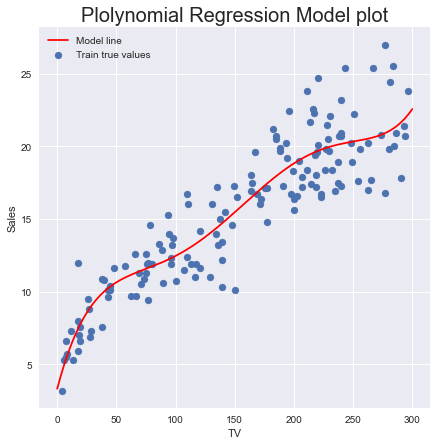

In [8]:
plt.figure(figsize = (7,7))
plt.scatter(X_train, y_train)
plt.plot(X_pred_plot, y_pred_plot,color = 'red')
# plt.scatter(X_train, model_LR.predict(X_poly),color = 'red')
plt.legend(['Model line','Train true values'])
plt.title('Plolynomial Regression Model plot',size = 20)
plt.xlabel('TV')
plt.ylabel('Sales');

## SAVE MODEL

In [9]:
result = model_LR.score(X_poly, y_train)
result

0.8321318850617729

In [10]:
import joblib
joblib.dump(model_LR,'Sales_polynomial_Model.sav')

['Sales_polynomial_Model.sav']